# Effect of a and b in van der Waals isotherms


**Code:** #114-000

**File:** `apps/van_der_waals/effect_of_a_and_b.ipynb`

-----------

The aim of this notebook is to visualize the effect of a and b parameters on van der Waals' isotherms.

## Interface

The main interface (``main_block_114_000``) is divided in two HBox: ``top_block_114_000`` and ``bottom_block_114_000``. ``top_block_114_000`` contains of 5 bqplot Figures: ``fig_114_001``, ``fig_114_002``, ``fig_114_003``, ``fig_114_004`` and ``fig_114_005``.  

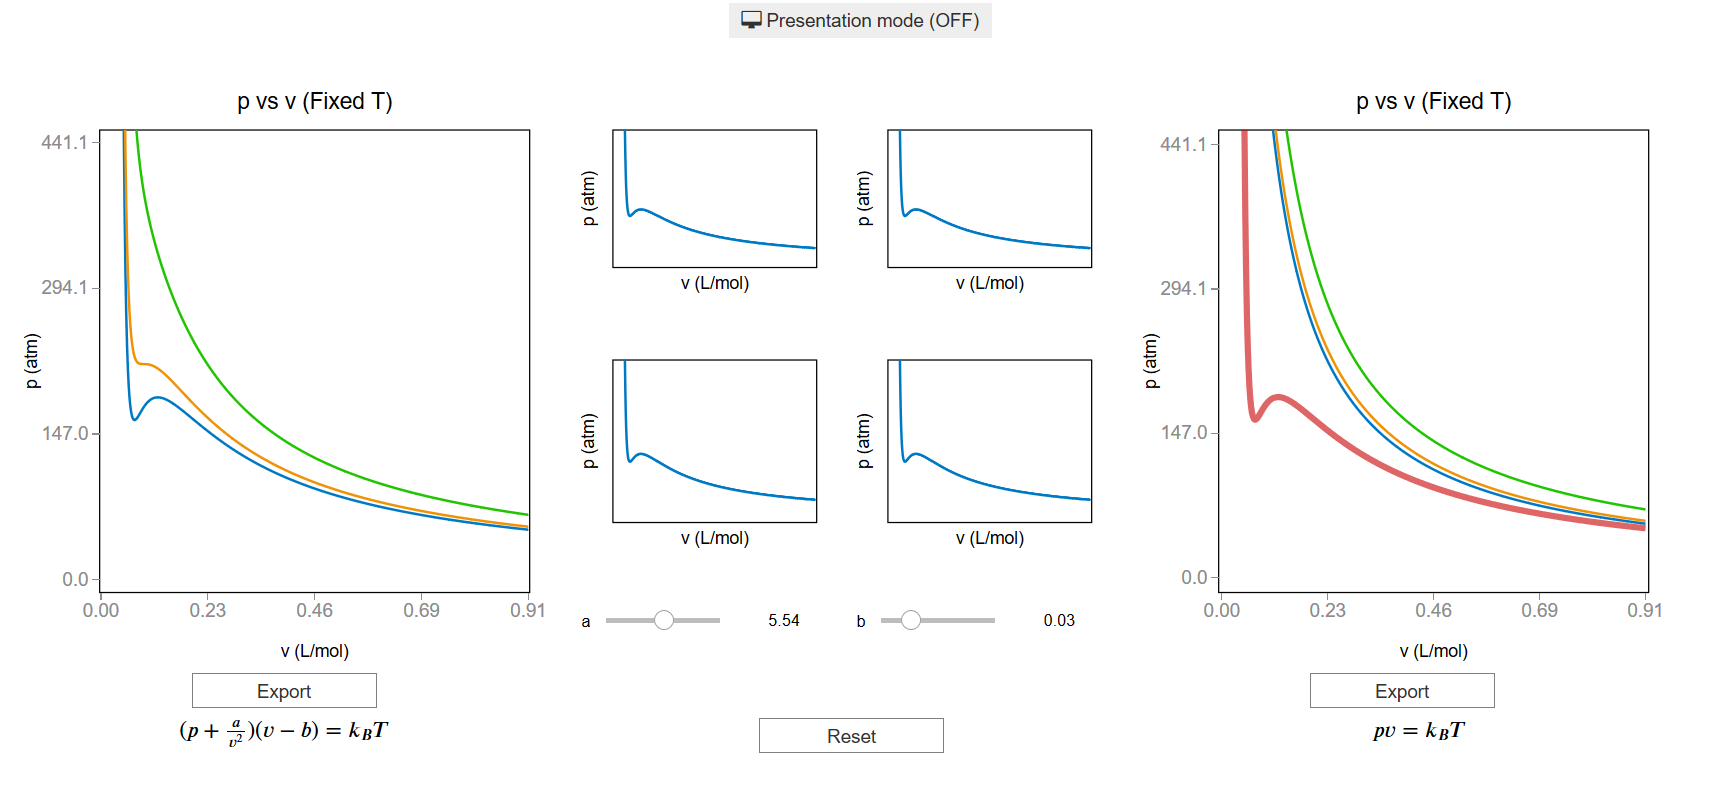

In [1]:
from IPython.display import Image
Image(filename='../../static/images/114-000_1.png')

The sliders ``a_slider_114_003`` and ``b_slider_114_004`` update the values of $a$ and $b$ which updates the isotherms of ``fig_114_003``, ``fig_114_004`` and ``fig_114_005``. The button ``reset_button`` resets the values of $a$ and $b$.

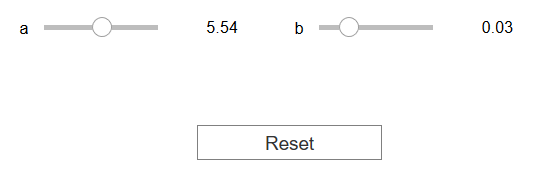

In [2]:
from IPython.display import Image
Image(filename='../../static/images/114-000_2.png')

## CSS
A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [3]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.widget-label { display: contents !important; }</style>"))
display(HTML("<style>.slider-container { margin: 12px !important; }</style>"))

## Packages

In [4]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_absolute_isotherms`
- `calculate_critic`
- `bar_to_atm`

In [5]:
def get_absolute_isotherms(a, b, v_values, T_values):
    """This function calculates the theoretical p(v, T) plane 
        (in absolute coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        a: Term related with the attraction between particles in
           L^2 bar/mol^2.\n
        b: Term related with the volume that is occupied by one 
        mole of the molecules in L/mol.\n
        v_values: An array containing the values of v
        for which the isotherms must be calculated.\n
        T_values: An array containing the values of T for which
        the isotherms must be calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """
    isotherms = []

    R = 0.082 * 1.01325 #bar L mol^-1 K^-1

    for T in T_values:
        
        isot = []
        
        for v in v_values:
            
            p = R*T/(v - b) - (a/v**2)
            isot = np.append(isot, p)
            
        isotherms.append(isot)
        
    return isotherms

In [6]:
def calculate_critic(a, b):
    
    """
        This function calculates the critic point 
        (p_c, v_c, T_c) from given a and b parameters of 
        the Van der Waals equation of state for real gases.
        
        :math:`(P + a \\frac{n^2}{V^2})(V - nb) = nRT`
        
        :math:`p_c = \\frac{a}{27 b^2}`
        :math:`v_c = 3b`
        :math:`T_c = \\frac{8a}{27 b R}`
        
   Args:
       a: Term related with the attraction between particles in
       L^2 bar/mol^2.\n
       b: Term related with the volume that is occupied by one 
       mole of the molecules in L/mol.\n
       
   Returns:
       p_c: Critical pressure in bar.\n
       v_c: Critical volume in L/mol.\n
       T_c: Critical tenperature in K.\n
        
    """
    
    if b == 0.0:
        return None
    
    k_B = 1.3806488e-23 #m^2 kg s^-2 K^-1
    N_A = 6.02214129e23 
    R = 0.082 * 1.01325 #bar L mol^-1 K^-1
    
    p_c = a/27.0/(b**2)
    v_c = 3.0*b
    T_c = 8.0*a/27.0/b/R
    
    return p_c, v_c, T_c

In [7]:
def bar_to_atm(p_values):
    """This function changes the pressures of an array
    form bars to atm.
    
    Args:
        p_values: List consisted of pressures in bars.\n
        
    Returns:
        p_values: List consisted of pressures in atm.\n
    """
    
    p_values = np.array(p_values) * 0.9869 
        
    return p_values

## Functions related to interaction

In [8]:
def update_isotherms(change):
    """This function update the lines a_line, b_line and
    unique_isotherm when a_slider_114_003 or b_slider_114_004 are
    updated.
    """
    
    obj = change.owner
    T_values = [0.95*T_c]

    if obj is a_slider_114_003:

        v_values = np.linspace(1.2*b_initial, 10*v_c, 500)
        
        isotherms = get_absolute_isotherms(
            a_slider_114_003.value,
            b_initial,
            v_values,
            T_values
        )
        
        a_line.y = bar_to_atm(isotherms)[0]
        
    elif obj is b_slider_114_004:

        v_values = np.linspace(1.2*b_slider_114_004.value, 10*v_c, 500)
        
        if b_slider_114_004.value == 0.0:
            
            v_values = np.linspace(0.0001, 10*v_c, 500)
        
        isotherms = get_absolute_isotherms(
            a_initial,
            b_slider_114_004.value,
            v_values,
            T_values
        )
        
        b_line.x = v_values
        b_line.y = bar_to_atm(isotherms)[0]

    if b_slider_114_004.value == 0.0:
        
        v_values = np.linspace(0.0001, 10*v_c, 500)        
    
    isotherms = get_absolute_isotherms(
        a_slider_114_003.value,
        b_slider_114_004.value,
        v_values,
        T_values
    )
    
    unique_isotherm.x = v_values
    unique_isotherm.y = bar_to_atm(isotherms)[0]

In [9]:
def restart(a):
    """This function sets the values of a_slider_114_003
    and b_slider_114_004 to their initial ones.
    """
    
    a_slider_114_003.value, b_slider_114_004.value = a_initial, b_initial

In [10]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [11]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_114_001_button:
        
        export_plot(fig_114_001)
        
    elif button is prepare_export_fig_114_005_button:
        
        export_plot(fig_114_005)

In [12]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [13]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
a_initial = 5.536 #L^2 bar/mol^2
b_initial = 0.03049 #L/mol

a, b = a_initial, b_initial

p_c, v_c, T_c = calculate_critic(a, b)

T_values = [0.95*T_c, T_c, 1.2*T_c]
v_values = np.linspace(1.2*b, 10*v_c, 500)
colors = ['#0079c4','#f09205','#21c400']

p_values = get_absolute_isotherms(a, b, v_values, T_values)
p_values = bar_to_atm(p_values)

#######################################
###############FIGURES#################
#######################################


fig_114_001 = bq.Figure(
    title='p vs v (Fixed T)',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='100%', height='500px')
)

fig_114_002 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=30, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(width='90%', height='40%')
)

fig_114_003 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=10, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(width='90%', height='40%')
)

fig_114_004 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=10, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(width='90%', height='40%')
)

fig_114_005 = bq.Figure(
    title='p vs v (Fixed T)',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='100%', height='500px')
)

scale_x = bqs.LinearScale(min = 0.0, max = max(v_values))
scale_y = bqs.LinearScale(min = 0, max = 2.0*p_c)

axis_x = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, max(v_values), 5),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, 2.0*p_c, 4),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

axis_x_no_ticks = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='15px'
)

axis_y_no_ticks = bqa.Axis(
    scale=scale_y,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='15px'
)

fig_114_001.axes = [axis_x, axis_y]
fig_114_002.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_114_003.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_114_004.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_114_005.axes = [axis_x, axis_y]

#######################################
###############MARKS###################
#######################################

x_values = [ v_values for i in range(len(p_values))]
y_values = []
color_values = []
label_values = []

for i in range(len(p_values)):
    
    y_values.append(p_values[i])
    color_values.append(colors[i])
    label_values.append(str(T_values[i]))

new_state = bqm.Lines(
    x = x_values, 
    y = y_values, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True, 
    colors = color_values,
    labels = label_values,
)

old_state = bqm.Lines(
    x = x_values, 
    y = y_values, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

current_state = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

a_line = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

b_line = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

ideal_isotherms = get_absolute_isotherms(0, 0, v_values, T_values)
ideal_isotherms = bar_to_atm(ideal_isotherms)

ideal_line = bqm.Lines(
    x = x_values, 
    y = ideal_isotherms, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

unique_isotherm = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [0.6],
    visible = True,
    colors = ['#c90000'],
    labels = [label_values[0]],
    stroke_width = 5
)

fig_114_001.marks = [old_state]
fig_114_002.marks = [current_state]
fig_114_003.marks = [a_line]
fig_114_004.marks = [b_line]
fig_114_005.marks = [ideal_line, unique_isotherm]

############################
##########WIDGETS###########
############################

a_slider_114_003 = widgets.FloatSlider(
    min=0.0,
    max=2.0*a,
    step=0.1,
    value=a,
    description='a',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%')
)

a_slider_114_003.observe(update_isotherms, 'value')

b_slider_114_004 = widgets.FloatSlider(
    min=0.0,
    max=4.0*b,
    step=0.001,
    value=b,
    description='b',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%')
)

b_slider_114_004.observe(update_isotherms, 'value')

reset_button = widgets.Button(
    description='Reset',
    disabled=False,
    button_style='',
    tooltip='Return to the original state',
)

reset_button.on_click(restart)

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

prepare_export_fig_114_001_button = widgets.Button(
        description='Export',
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_114_001_button.on_click(prepare_export)

prepare_export_fig_114_005_button = widgets.Button(
        description='Export',
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_114_005_button.on_click(prepare_export)

############################
#########BLOCKS#############
############################

top_block_114_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_self='center'
    )
)
                    
top_block_114_000.children = [
    widgets.VBox([
        fig_114_001,
        prepare_export_fig_114_001_button
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
    widgets.VBox([
        fig_114_002,
        fig_114_003,
        a_slider_114_003
    ],
        layout=widgets.Layout(
            width='16%',
            height='500px',
            align_items='center',
            margin='40px 0 0 0'
        )
    ),
    widgets.VBox([
        fig_114_002,
        fig_114_004,
        b_slider_114_004
    ],
        layout=widgets.Layout(
            width='16%',
            height='500px',
            align_items='center',
            margin='40px 0 0 0'
        )
    ),
    widgets.VBox([
        fig_114_005,
        prepare_export_fig_114_005_button
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
]

bottom_block_114_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        height='60px',
        align_self='center'
    )
)
                    
bottom_block_114_000.children = [
    widgets.VBox([
        widgets.HTMLMath(
            value=r"\( (p + \frac{a}{v^2})(v - b) = k_B T \)"
        )
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
    widgets.VBox(
        [reset_button],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
    widgets.VBox([
        widgets.HTMLMath(
            value=r"\( p v = k_B T \)"
        )
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    )
                         ]

main_block_114_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_items='center'
    )
)

main_block_114_000.children = [
    change_view_button,
    top_block_114_000,
    bottom_block_114_000
]

figures = [
    fig_114_001,
    fig_114_002,
    fig_114_003,
    fig_114_004,
    fig_114_005,
]
                    
main_block_114_000